### 2.2.7 Gershgorin Circle Theorem

The **Gershgorin Circle Theorem** is a useful tool in linear algebra and control theory, particularly for analyzing the eigenvalues of a matrix. This theorem helps in determining the location of eigenvalues without explicitly calculating them, which can be very useful in the study of multi-agent systems.

### Gershgorin Circle Theorem

The theorem states that every eigenvalue of a complex square matrix \( A \) lies within at least one of the Gershgorin discs. For a given \( $ n \times n $ \) matrix \( $ A = [a_{ij}] $ \), the Gershgorin discs are defined as:

$$
D(a_{ii}, R_i) = \{ z \in \mathbb{C} : |z - a_{ii}| \leq R_i \}
$$

where \( $ R_i $\) is the sum of the absolute values of the non-diagonal entries in the \( i \)-th row:

$$
R_i = \sum_{j \neq i} |a_{ij}|
$$

### Example

Consider the matrix \( A \):

$$
A = \begin{pmatrix}
1 & -6 & 0 \\
3 & 3 & 2 \\
-1 & 0 & 2
\end{pmatrix}
$$

To apply the Gershgorin Circle Theorem, we first compute the Gershgorin discs for each row:

1. **First row**: $ ( a_{11} = 1 ), ( R_1 = |6| + |0| = 6 ) $
   - Disc: $( D(1, 6) = { z \in \mathbb{C} : |z - 1| \leq 6 } )$

2. **Second row**: $ ( a_{22} = 3 ), ( R_2 = |3| + |2| = 5 ) $
   - Disc: $( D(3, 5) = { z \in \mathbb{C} : |z - 3| \leq 5 } ) $

3. **Third row**: $ ( a_{33} = 2 ), ( R_3 = |1| + |0| = 1 )$
   - Disc: $( D(2, 1) = { z \in \mathbb{C} : |z - 2| \leq 1 } )$

Then for each column:

1. **First column**: $ ( a_{11} = 1 ), ( C_1 = |3| + |1| = 4 ) $
   - Disc: $( D(1, 4) = { z \in \mathbb{C} : |z - 1| \leq 4 } )$

2. **Second column**: $ ( a_{22} = 3 ), ( C_2 = |6| + |0| = 6 ) $
   - Disc: $( D(3, 6) = { z \in \mathbb{C} : |z - 3| \leq 6 } ) $

3. **Third column**: $ ( a_{33} = 2 ), ( C_3 = |0| + |2| = 2 )$
   - Disc: $( D(2, 2) = { z \in \mathbb{C} : |z - 2| \leq 2 } )$


### Visualization

- The first disc is centered at \( 1 \) with radius \( 6 \), covering the interval \( [-5, 7] \) on the real axis.
- The first disc is centered at \( 1 \) with radius \( 4 \), covering the interval \( [-3, 5] \) on the complex axis.
- The second disc is centered at \( 3 \) with radius \( 5 \), covering the interval \( [-2, 8] \).
- The second disc is centered at \( 3 \) with radius \( 6 \), covering the interval \( [-3, 9] \).
- The third disc is centered at \( 2 \) with radius \( 2 \), covering the interval \( [0, 4] \).



### Interpretation

According to the Gershgorin Circle Theorem, all eigenvalues of the matrix \( A \) must lie within the union of these discs. This provides a region in the complex plane where the eigenvalues are located, which can be particularly useful for stability analysis in control systems.

### Application in Multi-Agent Systems

In the context of multi-agent systems, the Gershgorin Circle Theorem can be used to analyze the stability of consensus algorithms. For instance, if the system's dynamics can be described by a matrix, ensuring that all eigenvalues lie within a certain region can help guarantee that the agents will reach consensus.


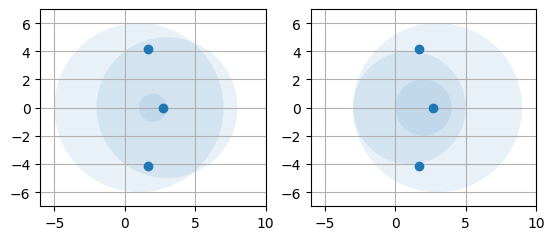

In [4]:
%matplotlib inline 
import numpy as np 
import numpy.linalg as LA 
import matplotlib 
from matplotlib.patches import Circle 
from matplotlib.collections import PatchCollection 
import matplotlib. pyplot as plt 

# Matrix A 
A = np.array ([[1,-6,0],[3,3,2],[-1,0,2]]) 

# Eigenvalues of A 
s, V = LA.eig(A) 
# Gershgorin circles R and C 
R = [] 
C = [] 
for i in range(len(A)): 
    center_i = A[i,i] 
    radius_Ri = np.sum(np.abs(A[i ,:])) - np.abs(A[i,i]) 
    radius_Ci = np.sum(np.abs(A[:,i])) - np.abs(A[i,i]) 
    Ri = Circle(( center_i , 0), radius_Ri) 
    R.append(Ri) 
    Ci = Circle(( center_i , 0), radius_Ci) 
    C.append(Ci) 

# Plot circles 
fig , ax = plt.subplots(1,2) 

# Circles in R 
p1 = PatchCollection(R, cmap= matplotlib.cm.jet , alpha=0.1) 
ax[0]. add_collection(p1) 
ax[0].axis([-6,10,-7 ,7]) 
ax[0]. set_aspect('equal',adjustable='box') 
ax[0].grid() 

# Circles in C 
p2 = PatchCollection(C, cmap= matplotlib.cm.jet , alpha=0.1) 
ax[1]. add_collection(p2) 
ax[1].axis([-6,10,-7 ,7]) 
ax[1]. set_aspect('equal',adjustable='box') 
ax[1].grid() 

# Plot eigenvalues 
ax[0].plot(np.real (s),np.imag(s),'o') 
ax[1].plot(np.real (s),np.imag(s),'o')

# Plot figure 
plt.show() 